In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import pandas as pd

Download the dataset

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [7]:
%cd /content/gdrive/MyDrive/ibm dataset

/content/gdrive/MyDrive/ibm dataset


In [8]:
!unzip Flowers-Dataset.zip


Archive:  Flowers-Dataset.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423eb8bf71_n.jpg  
  infla

In [9]:
data_dir = "/content/gdrive/MyDrive/ibm dataset/flowers"

Image Augmentation

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255, horizontal_flip = True, vertical_flip = True, zoom_range = 0.2)
x_train = train_datagen.flow_from_directory(r"/content/gdrive/MyDrive/ibm dataset/flowers", target_size = (64,64) , class_mode = "categorical", batch_size = 100)


Found 4317 images belonging to 5 classes.


In [12]:
data_augmentation = Sequential(
  [
    layers.RandomFlip("horizontal",input_shape=(180,180, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

Model Building

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
model = Sequential()




In [14]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(180, 180),
  batch_size=32)

Found 4317 files belonging to 5 classes.
Using 3454 files for training.


In [15]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(180, 180),
  batch_size=32)

Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [16]:
train_ds.class_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

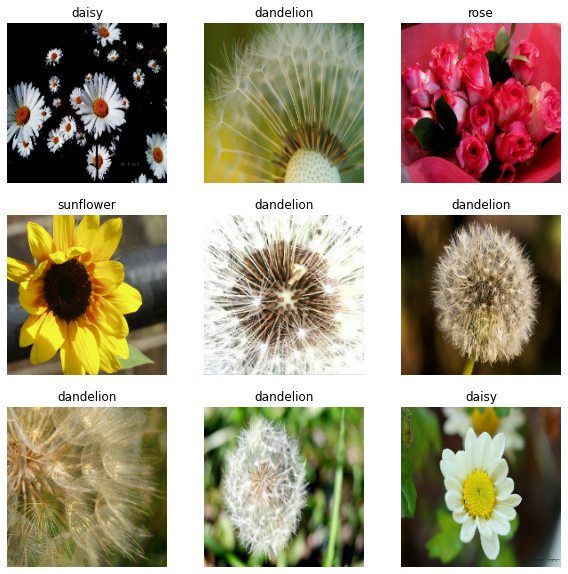

In [18]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[labels[i]])
    plt.axis("off")


Add the Layers

In [19]:
model.add(Convolution2D(32, (3,3), activation = "relu", input_shape = (64,64,3) ))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(300, activation = "relu"))
model.add(Dense(150, activation = "relu")) 
model.add(Dense(5, activation = "softmax")) 

In [20]:
num_classes = len(train_ds.class_names)

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(180, 180, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

Compile The Model

In [21]:
model.compile(loss = "categorical_crossentropy", metrics = ["accuracy"], optimizer = "adam")


In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Fit The Model(Training)

In [23]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=15
)

Epoch 1/15
108/108 [==============================] - 21s 96ms/step - loss: 1.2839 - accuracy: 0.4572 - val_loss: 1.1037 - val_accuracy: 0.5516
Epoch 2/15
108/108 [==============================] - 10s 91ms/step - loss: 1.0145 - accuracy: 0.5967 - val_loss: 0.9986 - val_accuracy: 0.6072
Epoch 3/15
108/108 [==============================] - 10s 92ms/step - loss: 0.9376 - accuracy: 0.6384 - val_loss: 0.9578 - val_accuracy: 0.6234
Epoch 4/15
108/108 [==============================] - 11s 96ms/step - loss: 0.8572 - accuracy: 0.6644 - val_loss: 0.8594 - val_accuracy: 0.6686
Epoch 5/15
108/108 [==============================] - 10s 92ms/step - loss: 0.8362 - accuracy: 0.6772 - val_loss: 0.8703 - val_accuracy: 0.6512
Epoch 6/15
108/108 [==============================] - 10s 91ms/step - loss: 0.7926 - accuracy: 0.6937 - val_loss: 0.8170 - val_accuracy: 0.6721
Epoch 7/15
108/108 [==============================] - 10s 91ms/step - loss: 0.7576 - accuracy: 0.7076 - val_loss: 0.8099 - val_accuracy:

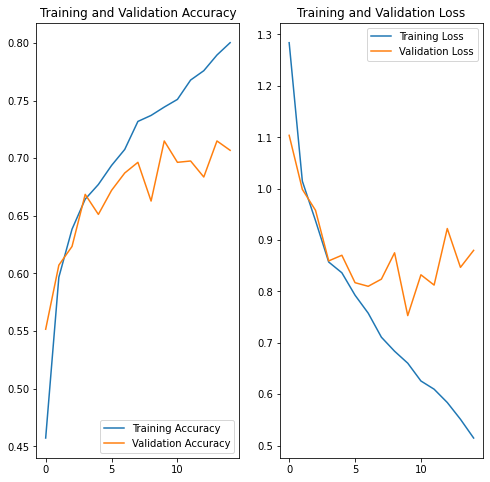

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Save the Model

In [25]:

model.save("flowersPredictor.h1")

In [26]:
model.save("flowersPredictorI.m5")

Test The Model

In [27]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [28]:
model = load_model("/content/gdrive/MyDrive/ibm dataset/flowersPredictor.h1")

In [66]:
flower_names=train_ds.class_names
flower_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

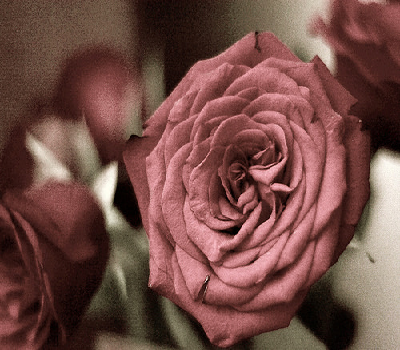

In [30]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/gdrive/MyDrive/ibm dataset/flowers/rose/12202373204_34fb07205b.jpg',target_size=(350,400))
img

In [52]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/gdrive/MyDrive/ibm dataset/flowers/rose/12202373204_34fb07205b.jpg',target_size=(180,180))
arr = image.img_to_array(img)
arr

array([[[ 73.,  49.,  39.],
        [ 87.,  61.,  48.],
        [ 90.,  68.,  55.],
        ...,
        [ 85.,  42.,  36.],
        [ 84.,  36.,  32.],
        [ 81.,  37.,  34.]],

       [[ 74.,  52.,  39.],
        [ 79.,  53.,  40.],
        [ 92.,  69.,  55.],
        ...,
        [ 97.,  50.,  44.],
        [103.,  52.,  48.],
        [106.,  53.,  49.]],

       [[ 91.,  69.,  55.],
        [ 73.,  47.,  34.],
        [ 82.,  59.,  45.],
        ...,
        [113.,  58.,  53.],
        [118.,  60.,  56.],
        [132.,  77.,  72.]],

       ...,

       [[120.,  65.,  60.],
        [110.,  57.,  51.],
        [113.,  60.,  54.],
        ...,
        [176., 160., 147.],
        [178., 164., 151.],
        [184., 167., 147.]],

       [[117.,  62.,  57.],
        [122.,  64.,  60.],
        [122.,  64.,  60.],
        ...,
        [191., 173., 163.],
        [176., 161., 142.],
        [182., 165., 149.]],

       [[115.,  60.,  55.],
        [130.,  71.,  67.],
        [128.,  

In [55]:
arr.ndim



3

In [54]:

carr = np.expand_dims(arr,axis=0)
carr

array([[[[ 73.,  49.,  39.],
         [ 87.,  61.,  48.],
         [ 90.,  68.,  55.],
         ...,
         [ 85.,  42.,  36.],
         [ 84.,  36.,  32.],
         [ 81.,  37.,  34.]],

        [[ 74.,  52.,  39.],
         [ 79.,  53.,  40.],
         [ 92.,  69.,  55.],
         ...,
         [ 97.,  50.,  44.],
         [103.,  52.,  48.],
         [106.,  53.,  49.]],

        [[ 91.,  69.,  55.],
         [ 73.,  47.,  34.],
         [ 82.,  59.,  45.],
         ...,
         [113.,  58.,  53.],
         [118.,  60.,  56.],
         [132.,  77.,  72.]],

        ...,

        [[120.,  65.,  60.],
         [110.,  57.,  51.],
         [113.,  60.,  54.],
         ...,
         [176., 160., 147.],
         [178., 164., 151.],
         [184., 167., 147.]],

        [[117.,  62.,  57.],
         [122.,  64.,  60.],
         [122.,  64.,  60.],
         ...,
         [191., 173., 163.],
         [176., 161., 142.],
         [182., 165., 149.]],

        [[115.,  60.,  55.],
       

In [61]:
resultant=model.predict(carr)
resultant

array([[ 0.7776003,  1.5719053,  3.923592 , -5.053927 ,  1.0115421]],
      dtype=float32)

In [65]:
flower_names[np.argmax(resultant)]

'rose'

It Successfully predicted the Rose flower!!!